In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [28]:
df=pd.read_csv("heart failure.csv")
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [29]:
df.shape

(299, 13)

In [30]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [31]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [32]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [33]:
df.DEATH_EVENT.value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

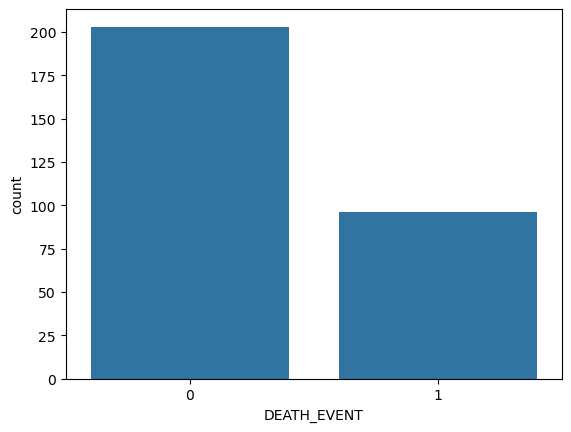

In [34]:
sns.countplot(x="DEATH_EVENT",data=df)

In [35]:
df.high_blood_pressure.value_counts()

high_blood_pressure
0    194
1    105
Name: count, dtype: int64

<Axes: xlabel='high_blood_pressure', ylabel='count'>

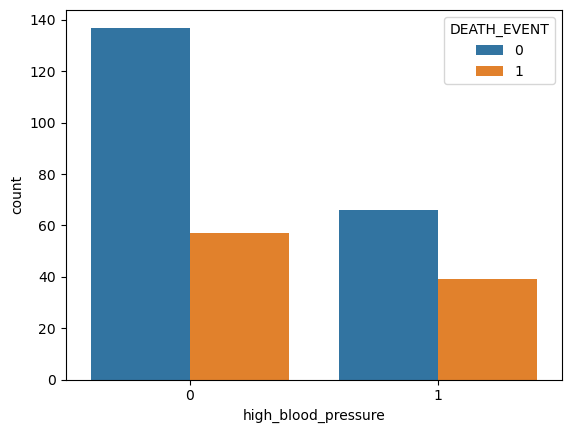

In [36]:
sns.countplot(x="high_blood_pressure",data=df,hue="DEATH_EVENT")

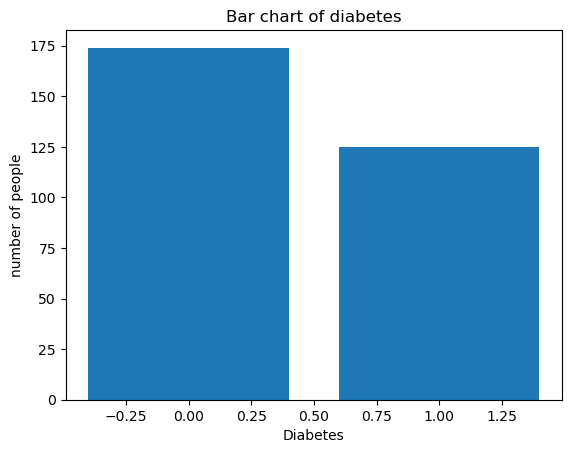

In [37]:
plt.bar(df["diabetes"].value_counts().index,df["diabetes"].value_counts().values)
plt.xlabel("Diabetes")
plt.ylabel("number of people")
plt.title("Bar chart of diabetes")
plt.show()

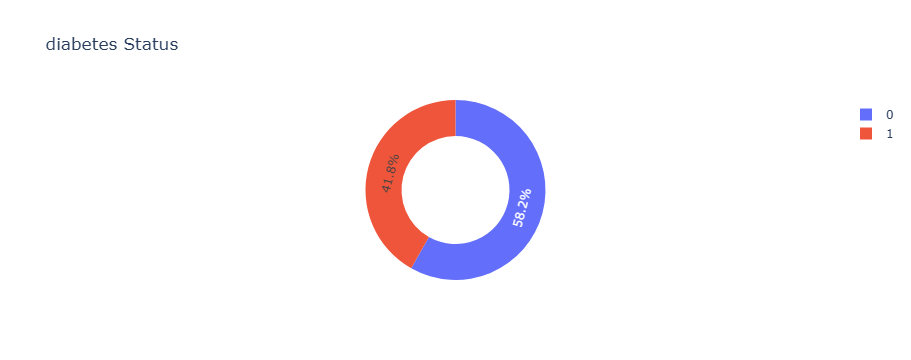

In [38]:
diabetes_Status= df['diabetes'].value_counts()
transactions=diabetes_Status.index
quantity=diabetes_Status.values

figure=px.pie(df,
              values=quantity,
              names=transactions,hole=.60,
              title="diabetes Status")
figure.show()

In [39]:
df.anaemia.value_counts()

anaemia
0    170
1    129
Name: count, dtype: int64

<Axes: xlabel='anaemia', ylabel='count'>

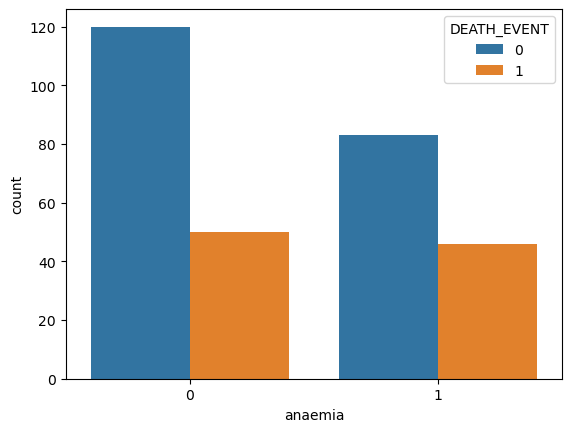

In [40]:
sns.countplot(x='anaemia',data=df,hue="DEATH_EVENT")

In [41]:
df.sex.value_counts()

sex
1    194
0    105
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

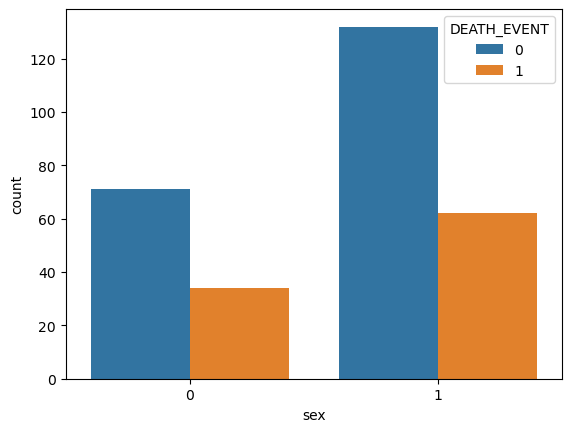

In [42]:
sns.countplot(x='sex',data=df,hue='DEATH_EVENT')

In [49]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df.drop('DEATH_EVENT',axis=1), df[['DEATH_EVENT']], random_state=42, train_size=.70)

In [50]:
xtrain.shape

(209, 12)

In [51]:
xtrain.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
224,58.0,0,582,1,25,0,504000.0,1.0,138,1,0,205
68,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66
222,42.0,1,86,0,35,0,365000.0,1.1,139,1,1,201
37,82.0,1,855,1,50,1,321000.0,1.0,145,0,0,30
16,87.0,1,149,0,38,0,262000.0,0.9,140,1,0,14


In [52]:
xtest.shape

(90, 12)

In [53]:
ytest.shape

(90, 1)

In [54]:
ytest.head(5)

,DEATH_EVENT
281,0
265,0
164,1
9,1
77,0


In [55]:
xtrain.shape

(209, 12)

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [57]:
dt.fit(xtrain , ytrain)

DecisionTreeClassifier()

In [58]:
pread=dt.predict(xtrain)
pread

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [59]:
import numpy as np
np.array(ytrain['DEATH_EVENT'])

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [60]:
pred=dt.predict(xtest)
pread

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [61]:
import numpy as np
np.array(ytest['DEATH_EVENT'])

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

In [62]:
dt.score(xtrain,ytrain['DEATH_EVENT'])

1.0

In [63]:
dt.score(xtest,ytest['DEATH_EVENT'])

0.6777777777777778

In [89]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, RocCurveDisplay

In [90]:
ytest.head()

,DEATH_EVENT
281,0
265,0
164,1
9,1
77,0


In [91]:
xtest.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
281,70.0,0,582,0,40,0,51000.0,2.7,136,1,1,250
265,50.0,1,298,0,35,0,362000.0,0.9,140,1,1,240
164,45.0,0,2442,1,30,0,334000.0,1.1,139,1,0,129
9,80.0,1,123,0,35,1,388000.0,9.4,133,1,1,10
77,42.0,0,102,1,40,0,237000.0,1.2,140,1,0,74


In [92]:
pred_test_data=dt.predict(xtest)
pred_test_data

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1], dtype=int64)

In [93]:
dt.score(xtest,ytest)

0.6777777777777778

In [94]:
accuracy_score(ytest,dt.predict(xtest))

0.6777777777777778

In [95]:
accuracy_score(ytest,pred_test_data)

0.6777777777777778

In [96]:
#confucation matrix

In [97]:
confusion_matrix(ytest,pred_test_data)

array([[42, 11],
       [18, 19]], dtype=int64)

In [98]:
cm=confusion_matrix(ytest,dt.predict(xtest))
cm                    

array([[42, 11],
       [18, 19]], dtype=int64)

<Axes: >

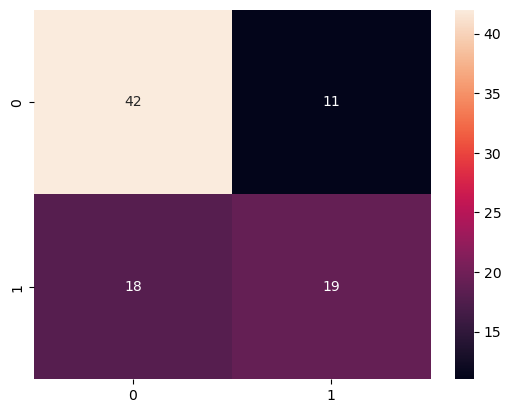

In [99]:
sns.heatmap(cm,annot=True)

In [100]:
precision_score(ytest,dt.predict(xtest))

0.6333333333333333

In [101]:
recall_score(ytest,dt.predict(xtest))

0.5135135135135135

In [102]:
f1_score(ytest,dt.predict(xtest))

0.5671641791044776

In [103]:
print(classification_report(ytest,dt.predict(xtest)))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74        53
           1       0.63      0.51      0.57        37

    accuracy                           0.68        90
   macro avg       0.67      0.65      0.66        90
weighted avg       0.67      0.68      0.67        90



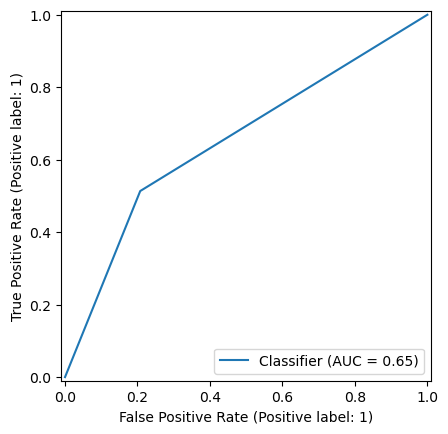

In [106]:
RocCurveDisplay.from_predictions(ytest, dt.predict(xtest))
plt.show()

In [ ]:
#K_Foldcv

In [116]:
x=df.drop("DEATH_EVENT",axis=1)
y=df[["DEATH_EVENT"]]

In [117]:
from sklearn.model_selection import KFold, cross_val_score

In [118]:
KFlod= KFold(n_splits=5,shuffle=True)

In [119]:
result=cross_val_score(dt,x,y,cv=KFlod)

In [120]:
result

array([0.83333333, 0.81666667, 0.73333333, 0.76666667, 0.84745763])

In [121]:
result.mean()

0.7994915254237288

In [ ]:
#Stratified KFlod

In [123]:
from sklearn.model_selection import StratifiedKFold

In [129]:
st=StratifiedKFold(n_splits=5)

In [130]:
score2=cross_val_score(dt,x,y,cv=st)

In [131]:
score2

array([0.36666667, 0.9       , 0.7       , 0.58333333, 0.66101695])

In [132]:
score2.mean()

0.6422033898305084

In [ ]:
#Leave one out

In [135]:
from sklearn.model_selection import LeaveOneOut

In [136]:
le=LeaveOneOut()

In [137]:
result3=cross_val_score(dt,x,y,cv=le)
result3

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 1.

In [138]:
result3.mean()

0.7792642140468228